# Decision Tree

A Decision Tree is a flowchart-like tree structure where an internal node represent feature (or attribute), the branch represent a decision rule, and each leaf node represent the outcome.

In [1]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X = df.drop("species",axis=1)
y = df["species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [3]:
# Defining an object for DTC and fitting for whole dataset
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [4]:
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

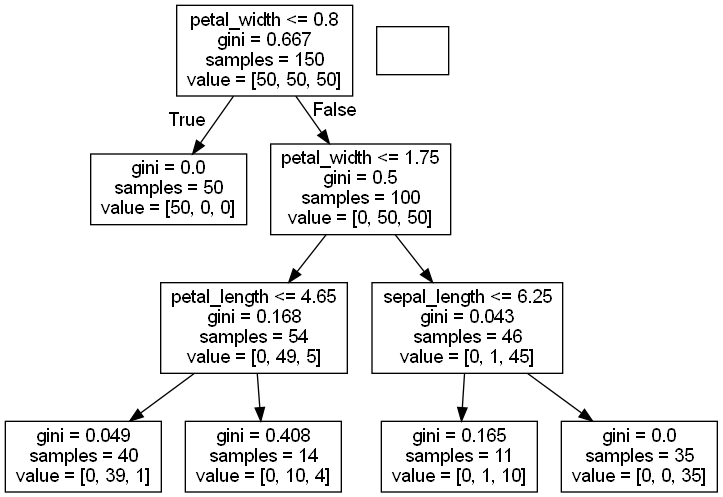

In [5]:
# Plotting of decission tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
features = X.columns
dot_data = export_graphviz(dt, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [6]:
# Defining an object for DTC and fitting for train dataset
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9555555555555556


In [9]:
# The accuracy of the DT has slightly overfit
# Shall try hyperparameter tuning to reduce overfitting if possible

In [11]:
#Classification for test before hyperparameter tuning
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [15]:
# Hyperparameter Tuning of DTC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
dt = DecisionTreeClassifier(random_state=1)

params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}

gsearch = GridSearchCV(dt, param_grid=params, cv=3)

gsearch.fit(X,y)

gsearch.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [16]:
# Passing best parameter for the Hyperparameter Tuning
dt = DecisionTreeClassifier(**gsearch.best_params_, random_state=1)

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_prob_train = dt.predict_proba(X_train)[:,1]

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

In [18]:
from sklearn.metrics import confusion_matrix 
print('Confusion Matrix - Train:','\n',confusion_matrix(y_train,y_pred_train))
print('\n','Confusion Matrix - Test:','\n',confusion_matrix(y_test,y_pred))

Confusion Matrix - Train: 
 [[36  0  0]
 [ 0 32  0]
 [ 0  0 37]]

 Confusion Matrix - Test: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [19]:
#Classification for test after hyperparameter tuning
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [20]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9555555555555556
